In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [34]:
df= pd.read_csv ('api.csv', encoding='utf-8')

In [ ]:
df['API_diff'] = df.loc[:, ].sum(axis=1)['Info_contact_name_changes', 'Servers_modified', 'Endpoints_added', 'Endpoints_deleted', 'Components_parameters_added', 'Servers_added', 'Servers_deleted', 'Paths_added', 'Paths_deleted', 'Components_Security_Schemes_added', 'Components_Security_Schemes_deleted', 'Tags_added', 'Tags_deleted', 'Components_Headers_Added', 'Components_Headers_Deleted', 'Components_Request_Bodies_Added', 'Components_Request_Bodies_Deleted', 'Components_Responses_Added', 'Components_Responses_Deleted', 'Components_Schemas_Added', 'Components_Schemas_Deleted', 'Components_Links_Added', 'Components_Links_Deleted', 'Info_title_changes', 'Info_description_changes', 'Info_contact_url_changes', 'Info_contact_email_changes', 'Info_license_name_changes', 'Info_license_url_changes', 'Info_termsOfService_changes', 'Components_parameters_deleted', 'Components_Security_Schemes_modified', 'Tags_modified', 'Paths_modified']

In [ ]:
df.label=df.label.astype('category').cat.codes

In [35]:
allowed_labels = ['major', 'minor', 'patch']
labels = df[df['label'].isin(allowed_labels)]

In [38]:
labels.sort_values(by=['api_spec_id', 'commit_date'], inplace=True)

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_78579/853084465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels.sort_values(by=['api_spec_id', 'commit_date'], inplace=True)


In [ ]:
labels.to_csv('prac.csv', index=False)

In [ ]:
labels.label=labels.label.astype('category').cat.codes

In [ ]:
df.sort_values(by=['api_spec_id', 'commit_date'], inplace=True)

In [ ]:
df.fillna(0, inplace=True)

In [19]:
new_label =  labels[['label','api_spec_id','Info_contact_name_changes', 'Servers_modified', 'Endpoints_added', 'Endpoints_deleted', 'Components_parameters_added', 'Servers_added', 'Servers_deleted', 'Paths_added', 'Paths_deleted', 'Components_Security_Schemes_added', 'Components_Security_Schemes_deleted', 'Tags_added', 'Tags_deleted', 'Components_Headers_Added', 'Components_Headers_Deleted', 'Components_Request_Bodies_Added', 'Components_Request_Bodies_Deleted', 'Components_Responses_Added', 'Components_Responses_Deleted', 'Components_Schemas_Added', 'Components_Schemas_Deleted', 'Components_Links_Added', 'Components_Links_Deleted', 'Info_title_changes', 'Info_description_changes', 'Info_contact_url_changes', 'Info_contact_email_changes', 'Info_license_name_changes', 'Info_license_url_changes', 'Info_termsOfService_changes', 'Components_parameters_deleted', 'Components_Security_Schemes_modified', 'Tags_modified', 'Paths_modified']]

In [20]:
new_label.fillna(0, inplace=True)

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_78579/3669396200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_label.fillna(0, inplace=True)


In [ ]:
X = new_label[['label']]
y= new_label[['Info_contact_name_changes', 'Servers_modified', 'Endpoints_added', 'Endpoints_deleted', 'Components_parameters_added', 'Servers_added', 'Servers_deleted', 'Paths_added', 'Paths_deleted', 'Components_Security_Schemes_added', 'Components_Security_Schemes_deleted', 'Tags_added', 'Tags_deleted', 'Components_Headers_Added', 'Components_Headers_Deleted', 'Components_Request_Bodies_Added', 'Components_Request_Bodies_Deleted', 'Components_Responses_Added', 'Components_Responses_Deleted', 'Components_Schemas_Added', 'Components_Schemas_Deleted', 'Components_Links_Added', 'Components_Links_Deleted', 'Info_title_changes', 'Info_description_changes', 'Info_contact_url_changes', 'Info_contact_email_changes', 'Info_license_name_changes', 'Info_license_url_changes', 'Info_termsOfService_changes', 'Components_parameters_deleted', 'Components_Security_Schemes_modified', 'Tags_modified', 'Paths_modified']]

In [8]:
X= new_label.drop(columns=["label"])
y= new_label['label']

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

uni = SelectKBest(score_func = f_classif, k =16)
fit = uni.fit(X,y)

/usr/local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14 21 22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [12]:
X.columns[fit.get_support(indices=True)].tolist()

['Endpoints_added',
 'Endpoints_deleted',
 'Components_parameters_added',
 'Paths_added',
 'Paths_deleted',
 'Components_Security_Schemes_added',
 'Components_Security_Schemes_deleted',
 'Components_Headers_Added',
 'Components_Request_Bodies_Added',
 'Components_Request_Bodies_Deleted',
 'Components_Responses_Added',
 'Components_Schemas_Added',
 'Info_description_changes',
 'Info_termsOfService_changes',
 'Tags_modified',
 'Paths_modified']

In [13]:
# load and summarize the dataset
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3748, 34) (3748,)
Test (1607, 34) (1607,)


In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

# configure to select all features
fs = SelectKBest(score_func=f_classif, k=5)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

/usr/local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14 21 22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Feature 0: 1.842508
Feature 1: 0.507980
Feature 2: 13.509282
Feature 3: 2.696757
Feature 4: 4.045443
Feature 5: 0.523961
Feature 6: 0.150668
Feature 7: 10.828436
Feature 8: 1.658768
Feature 9: 1.506183
Feature 10: 5.648018
Feature 11: 0.058653
Feature 12: 1.108934
Feature 13: 3.760557
Feature 14: nan
Feature 15: 3.187308
Feature 16: 3.036974
Feature 17: 7.050070
Feature 18: 0.541117
Feature 19: 16.344863
Feature 20: 0.375145
Feature 21: nan
Feature 22: nan
Feature 23: 0.238638
Feature 24: 12.473059
Feature 25: 0.991939
Feature 26: 2.841857
Feature 27: 0.324726
Feature 28: 1.180211
Feature 29: 241.486125
Feature 30: 1.334843
Feature 31: 1.071118
Feature 32: 255.975522
Feature 33: 35.615577


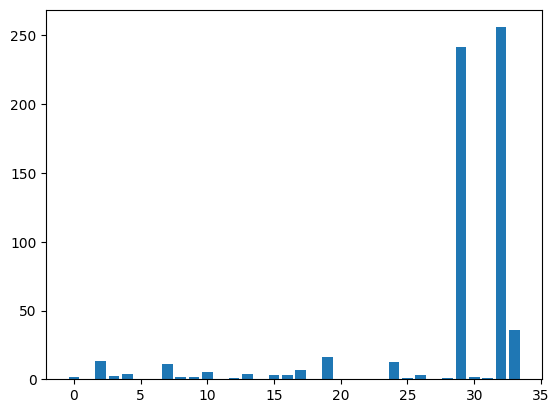

In [15]:
from matplotlib import pyplot

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
import plotly.express as px

fig = px.imshow(new_df.corr(), x=new_df.columns, y=new_df.columns,color_continuous_scale='Viridis', aspect="auto", text_auto=True, width=2500, height=1000)


In [ ]:
allowed_labels = ['major', 'minor', 'patch']
labels = df[df['label'].isin(allowed_labels)]

In [ ]:
labels = labels.drop(['id', 'version_location', 'API_diff','paths.modified'], axis=1)

In [ ]:
labels.to_csv('labels.csv', index=False)

In [ ]:
labels = labels.fillna(0)

In [ ]:
labels['label'] = labels['label'].astype('category')
labels['label'].cat.categories

In [ ]:
api_df = labels.sort_values(by=['api_spec_id','commit_date'], ascending=True) 

In [ ]:
new = labels.sort_values(by=['api_spec_id','commit_date'], ascending=True)

In [ ]:
new.drop(['commit_date', 'info_version','api_spec_id'], axis=1, inplace=True)

In [ ]:
new.info()

In [ ]:
avg_cosine_distances = new.groupby('api_spec_id')['Cosine_distance'].mean()

# add average cosine distance to the dataframe
new['average_cosine_distance'] = new['api_spec_id'].map(avg_cosine_distances)


In [ ]:
fig=px.histogram(new, x="Cosine_distance", color="label", nbins=100, title="Average Cosine Distance of API Versions", width=1000, height=500)

fig.update_layout(xaxis_range=[0, 0.99], yaxis_range=[0, 500])
fig.show()

In [ ]:
# for practice dataframe
avg_cosine_distances = api_df.groupby('api_spec_id')['Cosine_distance'].mean()

# add average cosine distance to the dataframe
api_df['average_cosine_distance'] = api_df['api_spec_id'].map(avg_cosine_distances)

api_df['commit_date'] = pd.to_datetime(api_df['commit_date'])

api_df['Commit_Date'] = api_df['commit_date'].dt.date


In [ ]:
new['commit_date'] = pd.to_datetime(new['commit_date'])
new['Commit_Date'] = new['commit_date'].dt.date


#df = pd.DataFrame({'dt': pd.date_range('2021-01-01', '2021-01-05')})
new['commit_date_int'] = new['commit_date'].dt.year * 1000 + new['commit_date'].dt.month * 100 + new['commit_date'].dt.day


In [ ]:
new = new.fillna(0)

In [ ]:
new.label=new.label.astype('category').cat.codes

In [ ]:
new.drop (['commit_date', 'commit_date_int', 'l2norm', 'Cosine_distance', 'cluster', 'api_spec_id','average_cosine_distance', 'Commit_Date'], axis=1, inplace=True)

In [ ]:
from sklearn.cluster import KMeans

wcss = {} 
# Look through the number of clusters
for i in range(1,11):
  # Run kmeans model
  kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++', n_init='auto').fit(new)
  #Sum of squared distances of samples to their closest cluster center.
  wcss[i] = (kmeans.inertia_)
  # Print the within cluster sum of squares for each cluster number
  print(f'The within cluster sum of squares for {i} clusters is {wcss[i]:.2f}')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum Of Squares')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

s_score = {} 
# Loop through the number of clusters
for i in range(2,11): # Note that the minimum number of clusters is 2
  # Fit kmeans clustering model for each cluster number
  kmeans = KMeans(n_clusters=i, random_state=0,n_init='auto').fit(new)
  # Make prediction
  classes = kmeans.predict(new)
  # Calculate Silhouette score
  s_score[i] = (silhouette_score(new, classes)) 
  # Print the Silhouette score for each cluster number
  print(f'The silhouette score for {i} clusters is {s_score[i]:.3f}')

In [ ]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=2, n_init='auto', init='k-means++')
#Run the clustering algorithm
model = k_means.fit(new)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(new)

new['cluster'] = y_hat


In [ ]:
# K MEANS CLUSTERING

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new[['Info_contact_name_changes', 'Servers_modified', 'Endpoints_added', 'Endpoints_deleted',
           'Components_parameters_added', 'Servers_added', 'Servers_deleted', 'Paths_added', 'Paths_deleted',
           'Components_Security_Schemes_added', 'Components_Security_Schemes_deleted', 'Tags_added', 'Tags_deleted',
           'Components_Headers_Added', 'Components_Headers_Deleted', 'Components_Request_Bodies_Added',
           'Components_Request_Bodies_Deleted', 'Components_Responses_Added', 'Components_Responses_Deleted',
           'Components_Schemas_Added', 'Components_Schemas_Deleted', 'Components_Links_Added', 'Components_Links_Deleted',
           'Info_title_changes', 'Info_description_changes', 'Info_contact_url_changes', 'Info_contact_email_changes',
           'Info_license_name_changes', 'Info_license_url_changes', 'Info_termsOfService_changes', 
           'Components_parameters_deleted', 'Components_Security_Schemes_modified', 'Tags_modified', 'Paths_modified']])

# Define the number of clusters
k = 3

# Create an instance of KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=k, n_init='auto', init='k-means++', max_iter=300, random_state=0)

# Fit the data to the KMeans instance
kmeans.fit(data_scaled)

# Assign the labels to the data
new['cluster'] = kmeans.labels_

In [ ]:
new['cluster'].value_counts()

In [ ]:
# Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new[['Info_contact_name_changes', 'Servers_modified', 'Endpoints_added', 'Endpoints_deleted',
           'Components_parameters_added', 'Servers_added', 'Servers_deleted', 'Paths_added', 'Paths_deleted',
           'Components_Security_Schemes_added', 'Components_Security_Schemes_deleted', 'Tags_added', 'Tags_deleted',
           'Components_Headers_Added', 'Components_Headers_Deleted', 'Components_Request_Bodies_Added',
           'Components_Request_Bodies_Deleted', 'Components_Responses_Added', 'Components_Responses_Deleted',
           'Components_Schemas_Added', 'Components_Schemas_Deleted', 'Components_Links_Added', 'Components_Links_Deleted',
           'Info_title_changes', 'Info_description_changes', 'Info_contact_url_changes', 'Info_contact_email_changes',
           'Info_license_name_changes', 'Info_license_url_changes', 'Info_termsOfService_changes', 
           'Components_parameters_deleted', 'Components_Security_Schemes_modified', 'Tags_modified', 'Paths_modified']])

# Define the Agglomerative Clustering instance
agglo = AgglomerativeClustering(n_clusters=3, metric='cosine', linkage='complete')

# Fit the data to the Agglomerative Clustering instance
agglo.fit(data_scaled)

# Assign the labels to the data
new['agg_cluster'] = agglo.labels_


In [ ]:
# DBSCAN Clustering

from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new[['Info_contact_name_changes', 'Servers_modified', 'Endpoints_added', 'Endpoints_deleted',
           'Components_parameters_added', 'Servers_added', 'Servers_deleted', 'Paths_added', 'Paths_deleted',
           'Components_Security_Schemes_added', 'Components_Security_Schemes_deleted', 'Tags_added', 'Tags_deleted',
           'Components_Headers_Added', 'Components_Headers_Deleted', 'Components_Request_Bodies_Added',
           'Components_Request_Bodies_Deleted', 'Components_Responses_Added', 'Components_Responses_Deleted',
           'Components_Schemas_Added', 'Components_Schemas_Deleted', 'Components_Links_Added', 'Components_Links_Deleted',
           'Info_title_changes', 'Info_description_changes', 'Info_contact_url_changes', 'Info_contact_email_changes',
           'Info_license_name_changes', 'Info_license_url_changes', 'Info_termsOfService_changes', 
           'Components_parameters_deleted', 'Components_Security_Schemes_modified', 'Tags_modified', 'Paths_modified']])

# Define the DBSCAN instance
dbscan = DBSCAN(eps=0.5, min_samples=5, algorithm='auto', metric='euclidean', n_jobs=-1)

# Fit the data to the DBSCAN instance
dbscan.fit(data_scaled)

# Assign the labels to the data
new['dbscan'] = dbscan.labels_


In [ ]:
# Decision Tree Classifier for label prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = data_scaled
y = new['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print("Accuracy:", score)

new_data = scaler.transform(new[['Info_contact_name_changes', 'Servers_modified', 'Endpoints_added', 'Endpoints_deleted',
           'Components_parameters_added', 'Servers_added', 'Servers_deleted', 'Paths_added', 'Paths_deleted',
           'Components_Security_Schemes_added', 'Components_Security_Schemes_deleted', 'Tags_added', 'Tags_deleted',
           'Components_Headers_Added', 'Components_Headers_Deleted', 'Components_Request_Bodies_Added',
           'Components_Request_Bodies_Deleted', 'Components_Responses_Added', 'Components_Responses_Deleted',
           'Components_Schemas_Added', 'Components_Schemas_Deleted', 'Components_Links_Added', 'Components_Links_Deleted',
           'Info_title_changes', 'Info_description_changes', 'Info_contact_url_changes', 'Info_contact_email_changes',
           'Info_license_name_changes', 'Info_license_url_changes', 'Info_termsOfService_changes', 
           'Components_parameters_deleted', 'Components_Security_Schemes_modified', 'Tags_modified', 'Paths_modified']])
predicted_labels = clf.predict(new_data)

new['predicted_label'] = predicted_labels

new['predicted_label'].value_counts()

In [ ]:
new['API_diff'] = new.loc[:, ['Info_contact_name_changes', 'Servers_modified', 'Endpoints_added', 'Endpoints_deleted', 'Components_parameters_added', 'Servers_added', 'Servers_deleted', 'Paths_added', 'Paths_deleted', 'Components_Security_Schemes_added', 'Components_Security_Schemes_deleted', 'Tags_added', 'Tags_deleted', 'Components_Headers_Added', 'Components_Headers_Deleted', 'Components_Request_Bodies_Added', 'Components_Request_Bodies_Deleted', 'Components_Responses_Added', 'Components_Responses_Deleted', 'Components_Schemas_Added', 'Components_Schemas_Deleted', 'Components_Links_Added', 'Components_Links_Deleted', 'Info_title_changes', 'Info_description_changes', 'Info_contact_url_changes', 'Info_contact_email_changes', 'Info_license_name_changes', 'Info_license_url_changes', 'Info_termsOfService_changes', 'Components_parameters_deleted', 'Components_Security_Schemes_modified', 'Tags_modified', 'Paths_modified']].sum(axis=1)


In [ ]:
new[['label', 'cluster','dbscan', 'agg_cluster','predicted_label']]

new['predicted_label'].groupby(new['label']).value_counts()

In [ ]:
new['cluster'].groupby(new['label']).value_counts()

In [ ]:
new.label=new.label.astype('category').cat.codes

In [ ]:
import plotly.express as px

fig = px.scatter_3d(new, x='Endpoints_deleted', y='Paths_added', z='Cosine_distance', color='cluster', opacity=0.5, width=1000, height=1000, hover_data=['label', 'api_spec_id'],symbol='label')

fig.update_traces(showlegend=False)


fig.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a list of clustering algorithms
algorithms = ['KMeans', 'Agglomerative', 'DBSCAN']

# Create a list of the corresponding labels for each algorithm
labels = [kmeans.labels_, agglo.labels_, dbscan.labels_]

for i in range(len(algorithms)):
    plt.figure()
    plt.scatter(new['Paths_modified'], new['Paths_added'], c=labels[i])
    plt.title(algorithms[i])

# Display the plots
plt.show()


In [ ]:
fig = px.scatter_3d(new, x='Paths_modified',y='Paths_added',z='commit_date',color='cluster',hover_data=['label', 'api_spec_id'], width=900, height=800, symbol='label', opacity=0.7)

fig.update_layout(template='ggplot2')


fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(new, x='commit_date', y='Cosine_distance',hover_data=['label', 'api_spec_id'], width=900, height=800, color='agg_cluster', symbol='label', opacity=0.7)

fig.update_traces(showlegend=False, legendgroup='label', marker=dict(size=12, line=dict(width=0.6, color='DarkSlateGrey')))

fig.update_layout(template='ggplot2')

fig.show()


In [ ]:
import plotly.express as px

features = ["Paths_modified", "Paths_added","Paths_deleted", "Endpoints_added", "Endpoints_deleted","Tags_modified"]

fig = px.scatter_matrix(
    new,
    dimensions=features,
    hover_data=["api_spec_id", "label"],
    width=1560,
    height=1100,
    template="ggplot2",
    opacity=0.7,
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    color="label",
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
import plotly.express as px

features = ["Paths_modified", "Paths_added","Paths_deleted", "Endpoints_added", "Endpoints_deleted","Tags_modified"]

fig = px.scatter_matrix(
    new,
    dimensions=features,
    color="agg_cluster",
    hover_data=["api_spec_id", "label"],
    width=1600,
    height=1200,
    template="ggplot2",
    opacity=0.7
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
import plotly.express as px

features = ["Paths_modified", "Paths_added","Paths_deleted", "Endpoints_added", "Endpoints_deleted","Tags_modified"]

fig = px.scatter_matrix(
    new,
    dimensions=features,
    color="cluster",
    hover_data=["api_spec_id", "label"],
    width=1600,
    height=1200,
    template="ggplot2",
    opacity=0.7
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
new['API_diff'] = new.loc[:, ['Info_contact_name_changes', 'Servers_modified', 'Endpoints_added', 'Endpoints_deleted', 'Components_parameters_added', 'Servers_added', 'Servers_deleted', 'Paths_added', 'Paths_deleted', 'Components_Security_Schemes_added', 'Components_Security_Schemes_deleted', 'Tags_added', 'Tags_deleted', 'Components_Headers_Added', 'Components_Headers_Deleted', 'Components_Request_Bodies_Added', 'Components_Request_Bodies_Deleted', 'Components_Responses_Added', 'Components_Responses_Deleted', 'Components_Schemas_Added', 'Components_Schemas_Deleted', 'Components_Links_Added', 'Components_Links_Deleted', 'Info_title_changes', 'Info_description_changes', 'Info_contact_url_changes', 'Info_contact_email_changes', 'Info_license_name_changes', 'Info_license_url_changes', 'Info_termsOfService_changes', 'Components_parameters_deleted', 'Components_Security_Schemes_modified', 'Tags_modified', 'Paths_modified']].sum(axis=1)


In [ ]:
data2= new.query("api_spec_id==780").sort_values(by='commit_date')
data2[['api_spec_id', 'label', 'cluster', 'info_version', 'agg_cluster','dbscan']]

In [ ]:
data=new.query("api_spec_id==88623").sort_values(by='Commit_Date')
data.to_csv('data.csv')

In [ ]:
data=new.query("api_spec_id==88623").sort_values(by='Commit_Date')
#data['dupe'] = data.info_version.where(~data.info_version.duplicated(), '')
#data['label'].replace({np.nan: ''}, inplace=True)
#data['dupe1'] = data.label.where(~data.label.duplicated(), '').replace({np.nan: ''})


fig =px.scatter(data, x='Commit_Date', y='Cosine_distance', color='cluster', width=1500, height=900, hover_data=['label', 'api_spec_id'])
fig.add_trace(go.Scatter(mode='lines',
                         x=data["Commit_Date"],
                         y=data["Cosine_distance"],
                         line_color='black',
                         line_width=0.6,
                         line_shape='hv',
                         showlegend=False
                       )
             )

fig.update_layout(template='ggplot2', showlegend=False)

for _,row in data.iterrows():
    fig.add_annotation(
        go.layout.Annotation(
            x=row["Commit_Date"],
            y=row["Cosine_distance"],
            text=row['label'],
            showarrow=False,
            align='center',
            yanchor='auto',
            yshift=14,
            textangle=-0)
       )
    fig.add_annotation(
        go.layout.Annotation(
            x=row["Commit_Date"],
            y=row["Cosine_distance"],
            text=row['predicted_label'],
            showarrow=False,
            align='center',
            yanchor='auto',
            yshift=-10,
            textangle=-0)
         )

fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'),textposition='bottom center')

fig.show()

In [ ]:
data=new.query("api_spec_id==779").sort_values(by='Commit_Date')
data['dupe'] = data.info_version.where(~data.info_version.duplicated(), '')
#data['label'].replace({np.nan: ''}, inplace=True)
#data['dupe1'] = data.label.where(~data.label.duplicated(), '').replace({np.nan: ''})


fig =px.scatter(data, x='Commit_Date', y='Cosine_distance', color='label', width=1500, height=900, hover_data=['label', 'api_spec_id'])
fig.add_trace(go.Scatter(mode='lines',
                         x=data["Commit_Date"],
                         y=data["Cosine_distance"],
                         line_color='black',
                         line_width=0.6,
                         line_shape='hv',
                         showlegend=False
                       )
             )

fig.update_layout(template='ggplot2', showlegend=False)

for _,row in data.iterrows():
    fig.add_annotation(
        go.layout.Annotation(
            x=row["Commit_Date"],
            y=row["Cosine_distance"],
            text=row['dupe'],
            showarrow=False,
            align='center',
            yanchor='auto',
            yshift=14,
            textangle=-0)
       )
    fig.add_annotation(
        go.layout.Annotation(
            x=row["Commit_Date"],
            y=row["Cosine_distance"],
            text=row['predicted_label'],
            showarrow=False,
            align='center',
            yanchor='auto',
            yshift=-10,
            textangle=-0)
         )

fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'),textposition='bottom center')

fig.show()

In [28]:
api_specs= pd.read_csv('mongo_docs.csv', encoding='utf-8')

/var/folders/27/mp6sy3_d6_lgz19hyp_8n8z40000gn/T/ipykernel_78579/130578025.py:1: DtypeWarning: Columns (15,16,17,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  api_specs= pd.read_csv('mongo_docs.csv', encoding='utf-8')


In [29]:
api_specs.drop (['_id','filepath', 'filename','url', 'deleted', 'created_at', 'processed_at','updated_at','one_version_location', 'multiple_version_location','path_version_change_dates','path_version_change_interval'], axis=1, inplace=True)

In [30]:
new_label['api_spec_id'].isin(api_specs['id']).value_counts()

True    5355
Name: api_spec_id, dtype: int64

In [31]:
final_api = new_label.merge(api_specs, left_on='api_spec_id', right_on='id', how='left')

In [33]:
final_api.to_csv('final_api.csv', encoding='utf-8')